# Graduate Admission Prediction

Importing required libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Required Machine Learning Libraries for classification, prediction
from sklearn.model_selection import train_test_split,GridSearchCV      #for spliting the dataset in train and test
from sklearn.datasets import make_classification                       #for making classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report       #for checking accuracy of model
from sklearn.neighbors import KNeighborsClassifier      #for knn classification
from sklearn.tree import DecisionTreeClassifier         #for decision tree
from sklearn.naive_bayes import GaussianNB              #for exicuting Naive Bayes algorithm
from sklearn.linear_model import LogisticRegression     #for logistics regression
from sklearn.svm import SVC                             #for exicuting Support Vector Machine
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier        #for exicuting Random Forest
from sklearn.preprocessing import StandardScaler         #for scaling the dataset
from sklearn import preprocessing

import time
import warnings
warnings.filterwarnings("ignore")


Importing data set

In [48]:
data = pd.read_csv(r'F:\Work\Internsavy\New folder\Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Exploritory Data Analysis

Checking for Dimensions

In [49]:
print(data.shape)           #checking for dimensions of data
print("-"*90)
print(data.info())          #getting information about data
print("-"*90)
print(data.isna().sum())    #checking for NA values

(500, 9)
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
------------------------------------------------------------------------------------------
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR   

Since no NA values in dataset, so lets move further

In [50]:
#selecting int columns
int_cols = data.select_dtypes(include = "int64").columns.tolist()
print(int_cols)
print(len(int_cols))

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'Research']
5


In [51]:
#selecting float columns
flt_cols = data.select_dtypes(include="float64").columns.tolist()
print(flt_cols)
print(len(flt_cols))

['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
4


Descriptive Statistics

In [52]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [53]:
#dropping the unwantted columns
data1 = data.drop('Serial No.', axis = 1)
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0, 0.5, 'Count')

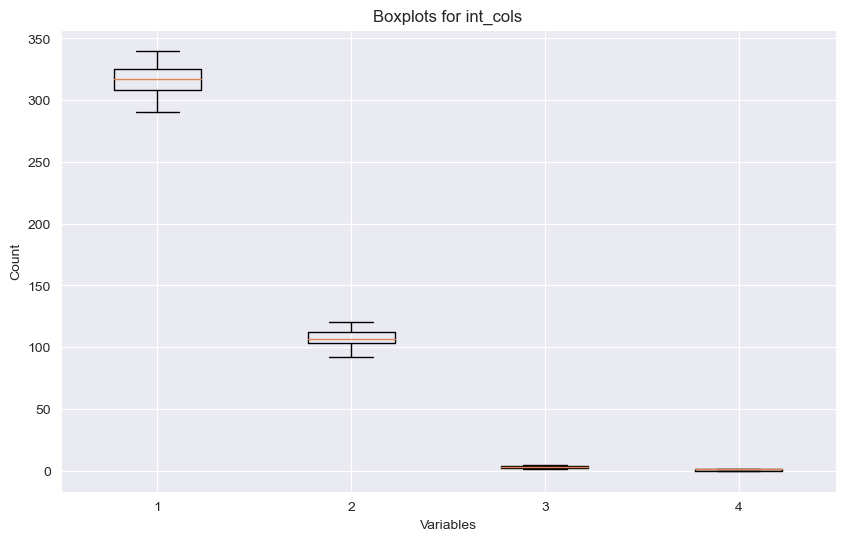

In [54]:
#Checking for outliers in int_cols
sns.set({"figure.figsize":(10,6)})
plt.title("Boxplots for int_cols")
plt.boxplot(data[['GRE Score', 'TOEFL Score', 'University Rating', 'Research']])
plt.xlabel("Variables")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

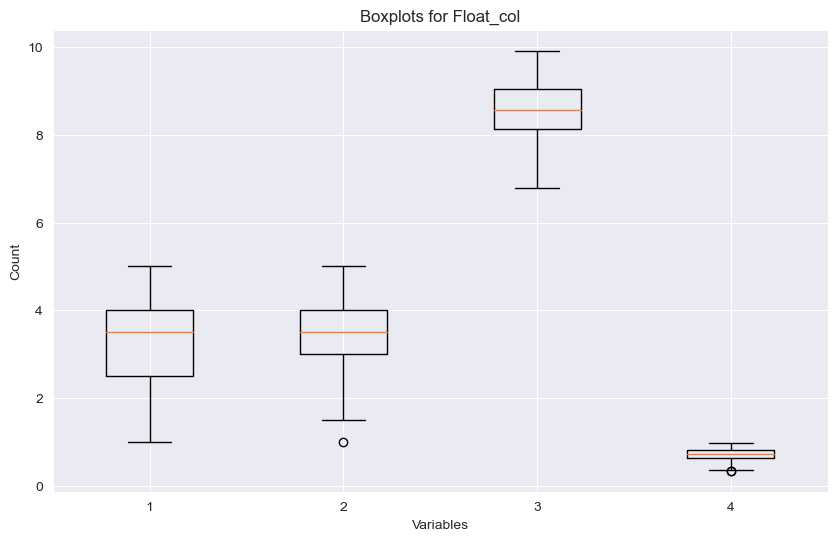

In [55]:
#Checking for outliers in flt_cols
sns.set({"figure.figsize":(10,6)})
plt.title("Boxplots for Float_col")
plt.boxplot(data[['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']])
plt.xlabel("Variables")
plt.ylabel("Count")

In the given dataset, chance of admit is continues variable which gives us the probability of admission, in order to make classification, we need to make "chance of admit" discrete.

In [56]:
# Lets change the values in the Admit column to binary. Where 0 indicates "Not Admitted", 1 indicates "Admitted". 
data1['Chance of Admit ']=np.where(data1['Chance of Admit ']>0.5,1,0)
data1['Chance of Admit '].head(10)


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: Chance of Admit , dtype: int32

In [57]:
#lets check the dataframe by adding original values

dummy=data1.assign(Original_admit=data["Chance of Admit "])
dummy.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Original_admit
0,337,118,4,4.5,4.5,9.65,1,1,0.92
1,324,107,4,4.0,4.5,8.87,1,1,0.76
2,316,104,3,3.0,3.5,8.00,1,1,0.72
3,322,110,3,3.5,2.5,8.67,1,1,0.80
4,314,103,2,2.0,3.0,8.21,0,1,0.65
5,330,115,5,4.5,3.0,9.34,1,1,0.90
6,321,109,3,3.0,4.0,8.20,1,1,0.75
7,308,101,2,3.0,4.0,7.90,0,1,0.68
8,302,102,1,2.0,1.5,8.00,0,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0,0.45


Here, we've converted the whole data into numeric, now lets build the model

In [58]:
# Making response and prediction variables
x=data1.drop("Chance of Admit ",axis=1)  #independant variables
y=data1["Chance of Admit "]              #variable supposed to be predicted
x.head(3)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [59]:
y.head(3)

0    1
1    1
2    1
Name: Chance of Admit , dtype: int32

In [60]:
# Splitting dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 49)

In [61]:
xtrain.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
184,316,106,2,2.5,4.0,8.32,0
340,312,107,3,3.0,3.0,8.46,1
21,325,114,4,3.0,2.0,8.40,0
207,310,102,3,3.5,4.0,8.02,1
489,302,110,3,4.0,4.5,8.50,0


In [62]:
xtest.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
339,324,107,5,3.5,4.0,8.66,1
371,324,110,3,3.5,3.0,9.22,1
455,305,102,2,1.5,2.5,7.64,0
239,299,100,1,1.5,2.0,7.89,0
85,319,103,4,4.5,3.5,8.66,0


In [63]:
ytrain.head(5)

184    1
340    1
21     1
207    1
489    1
Name: Chance of Admit , dtype: int32

In [64]:
ytest.head(5)

339    1
371    1
455    1
239    1
85     1
Name: Chance of Admit , dtype: int32

In [66]:
#standardizing the numeric data  
scaler=StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

Model Building and Evaluation

In [71]:
# Applying Logistics Regression model
log=LogisticRegression()

start_log=time.time()
log.fit(xtrain_scaled,ytrain)
end_log=time.time()

ytest_pred3=log.predict(xtest_scaled)
acc_log=accuracy_score(ytest,ytest_pred3)*100

train_score_log=log.score(xtrain_scaled,ytrain)*100

print(log)
print("Train Accuracy :{:.5f}".format(train_score_log))
print("Test Accuracy :{:.5f}".format(acc_log))
print("Training Time : {:.2f} seconds.".format(end_log-start_log))

LogisticRegression()
Train Accuracy :94.85714
Test Accuracy :94.00000
Training Time : 0.34 seconds.


In [76]:
BEST_MODEL=metrix.loc[metrix['Train_Accuracy'].idxmax() & metrix['Test_Accuracy'].idxmax()] 
BEST_MODEL

Model             Logistic Classifier
Train_Accuracy              94.857143
Test_Accuracy                    94.0
Name: 0, dtype: object

In [80]:
# Tuning Logistic Classifier using GridSearchCV

paras_log={"C":[0.1,1,10],"penalty":["l2"]}
gs_cv=GridSearchCV(LogisticRegression(),paras_log,cv=5)

gs_cv.fit(xtrain_scaled,ytrain)
pred_val=gs_cv.predict(xtest_scaled)

# Best Parameter
best_par=gs_cv.best_params_

#Best_Score
score=gs_cv.best_score_*100

In [81]:
# Algorithm 
gs_cv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [82]:
print("For GridSearchCV(), We have ,")
print("-"*40)
print("Best Parameter :",best_par)
print("Best score :",score)
print("-"*40)

For GridSearchCV(), We have ,
----------------------------------------
Best Parameter : {'C': 1, 'penalty': 'l2'}
Best score : 94.0
----------------------------------------


In [83]:
# Classification Report for Tuned ones

report=classification_report(ytest,pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.95      0.99      0.97       139

    accuracy                           0.94       150
   macro avg       0.85      0.63      0.68       150
weighted avg       0.93      0.94      0.93       150

